# 1. 다양한 그래프 알고리즘

- 알고리즘 종류  
DFS/BFS와 최단 경로에서 다룬 내용은 모두 그래프 알고리즘의 한 유형  
크루스칼 알고리즘 - 그리디 알고리즘  
위상 정렬 알고리즘 - 큐,스택 자료구조 활용  

- 복습  
그래프: 노드와 노드 사이의 간선의 정보를 갖는 자료구조  
서로 다른 개체가 연결, 도시 연결 -> 그래프 알고리즘을 떠올리기  

- 트리  
최소 힙은 항상 부모 노드가 자식 노드보다 크기가 작은 자료구조로서 트리 자료구조에 속함  

- 인접 행렬/인접 리스트  
인접 행렬은 플로이드 워셜 알고리즘(노드가 적으면)  
인접 리스트는 큐를 이용하는 다익스트라 최단 경로

## 서로소 집합

서로소 부분 집합들로 나누어진 원소들의 데이터를 처리하기 위한 자료구조  
union: 합치는 연산  
find:어떤 집합인지 알려줌

번호가 작으면 부모

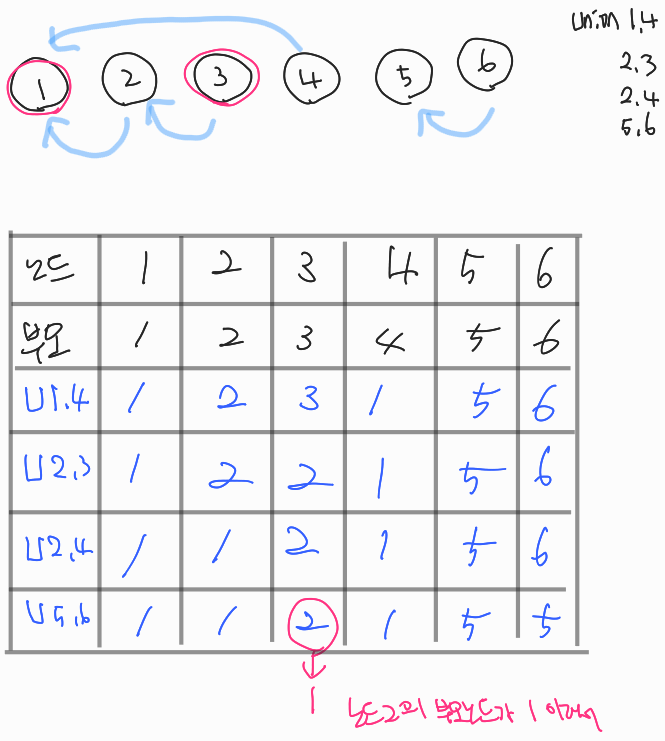

In [1]:
def find_parent(parent, x):
    if parent[x] != x:
        return find_parent(parent, parent[x])
    return x

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

v, e = map(int, input().split())
parent = [0] * (v + 1)

for i in range(1, v + 1):
    parent[i] = i

for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

print('각 원소가 속한 집합: ', end='')
for i in range(1, v + 1):
    print(find_parent(parent, i), end=' ')

print()

print('부모 테이블: ', end='')
for i in range(1, v + 1):
    print(parent[i], end=' ')

6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합: 1 1 1 1 5 5 
부모 테이블: 1 1 2 1 5 5 

- 좀 더 효율적으로 수정

In [4]:
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

v, e = map(int, input().split())
parent = [0] * (v + 1) 

for i in range(1, v + 1):
    parent[i] = i

for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

print('각 원소가 속한 집합: ', end='')
for i in range(1, v + 1):
    print(find_parent(parent, i), end=' ')

print()

print('부모 테이블: ', end='')
for i in range(1, v + 1):
    print(parent[i], end=' ')

6 4
1 4 
2 3
2 4
5 6
각 원소가 속한 집합: 1 1 1 1 5 5 
부모 테이블: 1 1 1 1 5 5 

- 사이클 판별

In [5]:
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

v, e = map(int, input().split())
parent = [0] * (v + 1)

for i in range(1, v + 1):
    parent[i] = i

cycle = False 

for i in range(e):
    a, b = map(int, input().split())
    if find_parent(parent, a) == find_parent(parent, b):
        cycle = True
        break
    else:
        union_parent(parent, a, b)

if cycle:
    print("사이클이 발생했습니다.")
else:
    print("사이클이 발생하지 않았습니다.")

3 3
1 2
1 3
2 3
사이클이 발생했습니다.


## 1.2 신장트리

하나의 그래프가 있을 때 모든 노드를 포함하면서 사이클이 존재하지 않는 부분 그래프  
트리 성립 조건:모든 노드가 포함되어 서로 연결되면서 사이클이 존재하지 않는 다는 조건

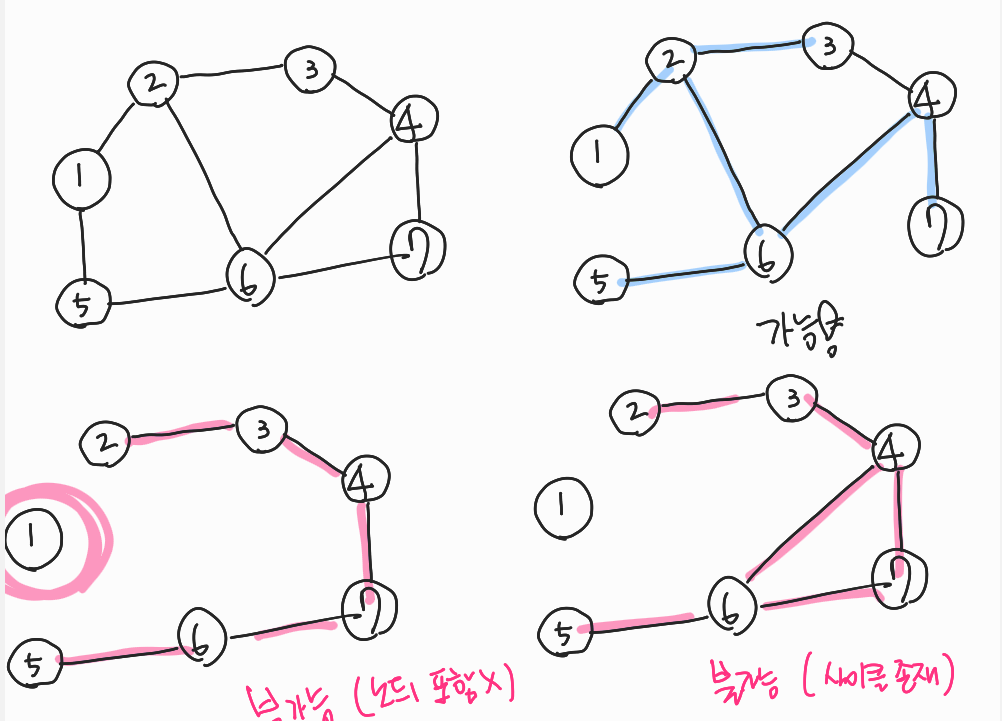

### 크루스칼 알고리즘

가장 최소한으로 전체 노드를 연결하는 알고리즘

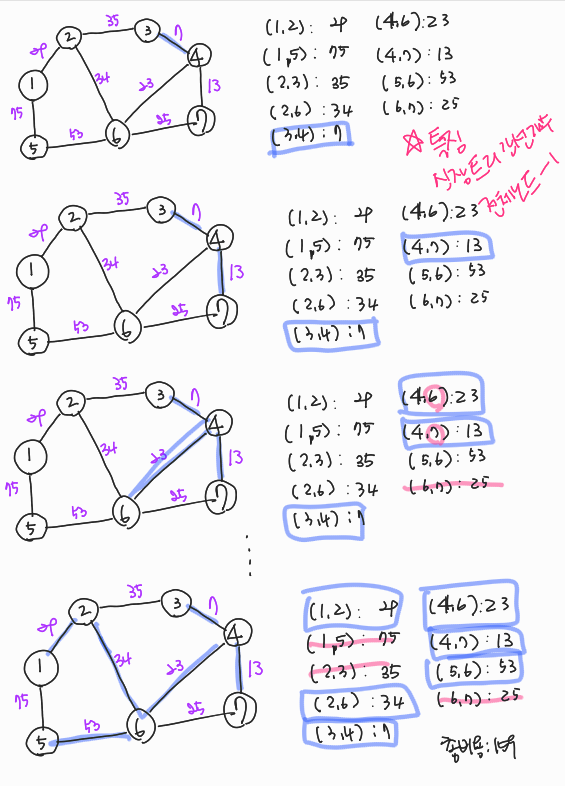

In [2]:
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

v, e = map(int, input().split())
parent = [0] * (v + 1) 

edges = []
result = 0

for i in range(1, v + 1):
    parent[i] = i

for _ in range(e):
    a, b, cost = map(int, input().split())
    edges.append((cost, a, b))

edges.sort()

for edge in edges:
    cost, a, b = edge
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost


7 9
1 2 29
1 5 75
2 3 35
2 6 34
3 4 7
4 6 23
4 7 13
5 6 53
6 7 25


In [3]:
print(result)

159


## 1.3 위상정렬

모든 노드를 방향성에 거스르지 않도록 순서대로 나열하는 것

진입 차수:특정 노드로 들어오는 간선의 개수

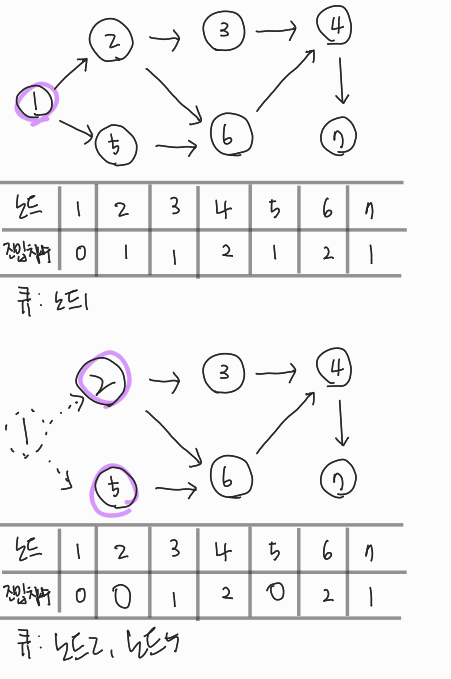

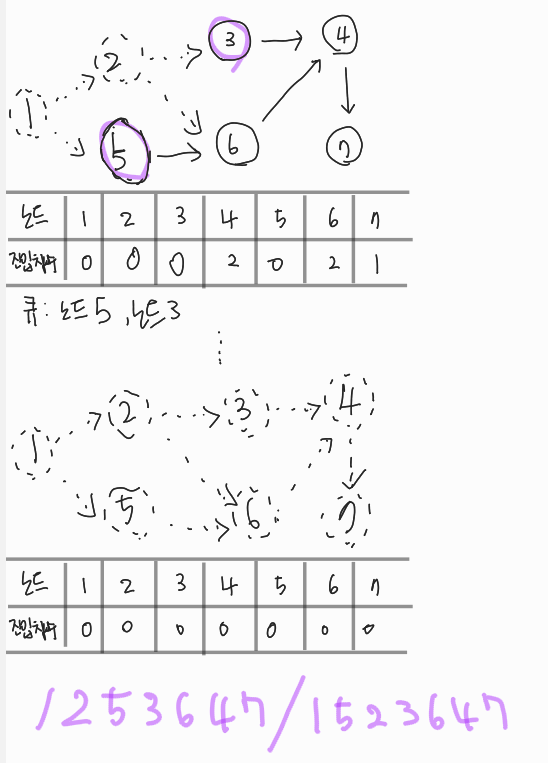

In [4]:
from collections import deque

v, e = map(int, input().split())
indegree = [0] * (v + 1)
graph = [[] for i in range(v + 1)]

for _ in range(e):
    a, b = map(int, input().split())
    graph[a].append(b)
    indegree[b] += 1

def topology_sort():
    result = [] 
    q = deque() 

    for i in range(1, v + 1):
        if indegree[i] == 0:
            q.append(i)

    while q:
        now = q.popleft()
        result.append(now)
        for i in graph[now]:
            indegree[i] -= 1
            if indegree[i] == 0:
                q.append(i)

    for i in result:
        print(i, end=' ')

7 8
1 2
1 5
2 3
2 6
3 4
4 7
5 6
6 4


In [5]:
topology_sort()

1 2 5 3 6 4 7 

# 2. 실전 문제- 팀 결성

학교에서 학생들에게 0부터 N번까지 번호를 부여  
처음에는 모든 학생이 다른 팀이라서 N+1개의 팀이 존재  
이때 선생님은 '팀 합치기'연산과 '같은 팀 여부 확인'연산을 할 수 있음  
선생님이 M개의 연산을 수행할 수 있을 때 연산 결과를 출력하는 프로그램 작성

- 입력 조건  
1이상 100000이하의 N,M이 첫 줄에 주어짐  
팀 합치기 연산은 0 a b형태로 주어지고, a번 학생이 속한 팀과 b번이 속한 팀을 합친다는 의미  
같은 팀 여부 확인 연산은 1 a b형태로 주어지고, a번 학생과 b번 학생이 같은 팀에 속해 있는지 확인한다는 의미  
a,b는 N이하의 양의 정수

- 출력 조건  
같은 팀 확인 여부 연산에 의해 한 줄에 하나씩 YES나 NO로 출력

In [6]:
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

n, m = map(int, input().split())
parent = [0] * (n + 1)

for i in range(0, n + 1):
    parent[i] = i

for i in range(m):
    oper, a, b = map(int, input().split())
    if oper == 0:
        union_parent(parent, a, b)
    elif oper == 1:
        if find_parent(parent, a) == find_parent(parent, b):
            print('YES')
        else:
            print('NO')

7 8
0 1 3
1 1 7
NO
0 7 6
1 7 1
NO
0 3 7
0 4 2
0 1 1 
1 1 1 
YES


# 3. 실전 문제- 도시 분할 계획

N개의 집과 그 집을 연결하는 M개의 길로 이루어져 있고 유지비가 든다  
마을을 2개의 마을로 분리하고 싶고 각 분리된 마을 안에 있는 집들은 서로 연결   
유지비는 최소

- 입력 조건  
첫 째줄에 집의 개수 N과 길의 개수 M이 주어짐  
N은 2 이상 100000이하인 정수, M은 1이상 1000000이하 정수  
그다음 줄부터 M줄에 걸쳐 길의 정보가 a,b,c로 구분되어 주어짐  
a번 집과 b번 집을 연결하는 길의 유지비가 c(1이상 1000이하)라는 의미

- 출력 조건  
길을 없애고 남은 유지비 합의 촤솟값을 출력

- 포인트  
2개의 신장 트리를 만들어야함  
크루스칼 알고리즘으로 최소 신장 트리를 찾은 뒤 가장 큰 간선을 삭제

In [7]:
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

v, e = map(int, input().split())
parent = [0] * (v + 1)

edges = []
result = 0

for i in range(1, v + 1):
    parent[i] = i

for _ in range(e):
    a, b, cost = map(int, input().split())
    edges.append((cost, a, b))

edges.sort()
last = 0


for edge in edges:
    cost, a, b = edge
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost
        last = cost

7 12
1 2 3
1 3 2
3 2 1
2 5 2
3 4 4
7 3 6
5 1 5
1 6 2
6 4 1
6 5 3
4 5 3
6 7 4


In [8]:
print(result - last)

8


# 4. 실전 문제- 커리큘럼

모든 강의는 1번부터 번호를 가지며 총 n개의 강의를 신청하려 함   

각 강의를 수강하기까지의 최소 시간을 출력하는 프로그램을 작성

- 입력조건  
첫 번째줄은 강의의 수 n(1이상 500이하)이 주어짐  
n개의 줄에는 각 강의의 강의 시간과 선수 강의의 번호가 자연수로 주어지며, 강의 시간은 100000이하의 자연수  
각 강의 번호는 1부터 n까지이며 각 줄은 -1로 끝남

- 출력 조건  
최소 시간을 출력

- 포인트  
위상 정렬 알고리즘 응용문제  

In [9]:
from collections import deque
import copy

v = int(input())
indegree = [0] * (v + 1)
graph = [[] for i in range(v + 1)]
time = [0] * (v + 1)


for i in range(1, v + 1):
    data = list(map(int, input().split()))
    time[i] = data[0] 
    for x in data[1:-1]:
        indegree[i] += 1
        graph[x].append(i)


def topology_sort():
    result = copy.deepcopy(time) 
    q = deque() 

    for i in range(1, v + 1):
        if indegree[i] == 0:
            q.append(i)

    while q:
        now = q.popleft()
        for i in graph[now]:
            result[i] = max(result[i], result[now] + time[i])
            indegree[i] -= 1
        
            if indegree[i] == 0:
                q.append(i)


    for i in range(1, v + 1):
        print(result[i])

5
10 -1
10 1 -1
4 1 -1
4 3 1 -1
3 3 -1


In [10]:
topology_sort()

10
20
14
18
17
